### Dataset 1: Iowa_Liquor_Sales.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df_liquour = pd.read_csv('Iowa_Liquor_Sales.csv')

C:\Users\yeswa\AppData\Local\Temp\ipykernel_3800\2687130306.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_liquour = pd.read_csv('Iowa_Liquor_Sales.csv')


In [3]:
df_liquour.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [4]:
df_liquour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      object 
 19  State Bottle Retail    object 
 20  Bottles Sold           int64  
 21  Sale (Dollars)         object 
 22  Volume Sold (Lit

#### Data processing

In [5]:
df_liquour['State Bottle Retail'] = df_liquour['State Bottle Retail'].replace('[\$,]', '', regex=True).astype(float)

In [6]:
df_liquour.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,9.60,2,$19.20,0.30,0.08


In [7]:
numeric_col_data = df_liquour.select_dtypes(include=['float64', 'int64'])

### Correlation Matrix

In [8]:
import seaborn as sns

In [9]:
correlation_matrix_df1 = numeric_col_data.corr()

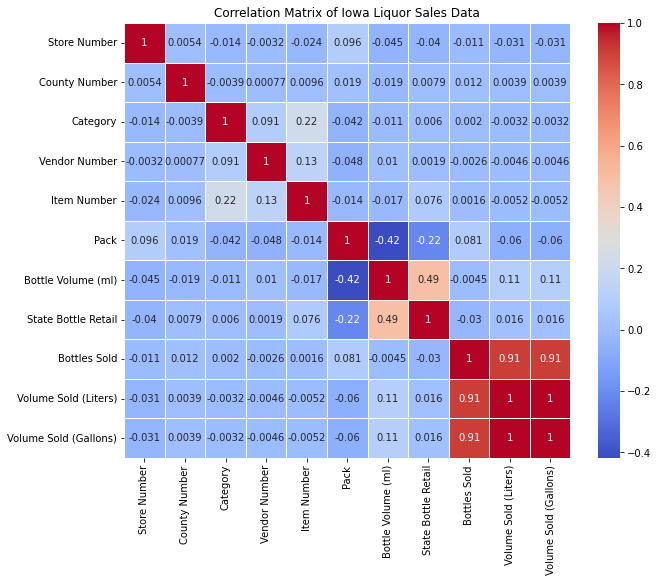

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Iowa Liquor Sales Data")
plt.show()

In [11]:
sales_evaluation = df_liquour.groupby(['Date', 'Store Number']).agg({
    'State Bottle Retail': 'mean',  
    'Bottles Sold': 'sum'  
}).reset_index()

In [12]:
sales_evaluation

,Date,Store Number,State Bottle Retail,Bottles Sold
0,01/02/2013,2200,15.355000,270
1,01/02/2013,2290,15.137643,657
2,01/02/2013,2475,14.388261,164
3,01/02/2013,2501,15.467186,1371
4,01/02/2013,2502,16.556471,771
...,...,...,...,...
291330,12/31/2015,4617,13.334595,284
291331,12/31/2015,4695,14.119000,90
291332,12/31/2015,4725,14.884000,59
291333,12/31/2015,5089,13.656667,140


#### 1. Dynamic pricing

In [13]:
x_data = sales_evaluation[['State Bottle Retail']]
y_data = sales_evaluation['Bottles Sold']

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer_dat = SimpleImputer(strategy='mean')

In [16]:
x_data = imputer_dat.fit_transform(x_data)

In [17]:
lr_model = LinearRegression()
lr_model.fit(x_data, y_data)

LinearRegression()

In [18]:
sales_evaluation['Predicted_Bottles_Sold'] = lr_model.predict(x_data)

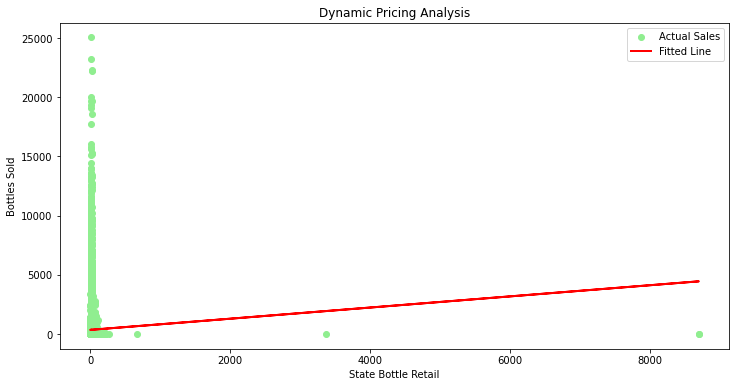

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(sales_evaluation['State Bottle Retail'], sales_evaluation['Bottles Sold'], color='lightgreen', label='Actual Sales')
plt.plot(sales_evaluation['State Bottle Retail'], sales_evaluation['Predicted_Bottles_Sold'], color='red', linewidth=2, label='Fitted Line')
plt.xlabel('State Bottle Retail')
plt.ylabel('Bottles Sold')
plt.title('Dynamic Pricing Analysis')
plt.legend()
plt.show()

#### 2. ⁠price elasticity

In [20]:
price_elasticity = lr_model.coef_[0]

In [21]:
print(f'Price Elasticity: {round(price_elasticity,2)}')

Price Elasticity: 0.47


#### 3. Conjoint Analysis

In [22]:
np.random.seed(0)
df_liquour['Preference_Score'] = np.random.uniform(1, 10, size=len(df_liquour))

In [23]:
conjoint_evaluation = df_liquour.groupby(['State Bottle Retail', 'Bottle Volume (ml)']).agg({
    'Preference_Score': 'mean'
}).reset_index()

In [24]:
x_conjoint_data = conjoint_evaluation[['State Bottle Retail', 'Bottle Volume (ml)']]
y_conjoint_data = conjoint_evaluation['Preference_Score']

In [25]:
conjoint_lr_model = LinearRegression()
conjoint_lr_model.fit(x_conjoint_data, y_conjoint_data)

LinearRegression()

In [26]:
conjoint_attribute_importance = conjoint_lr_model.coef_
print(f'Conjoint Attribute Importance: {conjoint_attribute_importance}')

Conjoint Attribute Importance: [ 2.80376141e-05 -1.40903606e-06]


#### 4. Regression Analysis

In [27]:
df_liquour = df_liquour.dropna(subset=['State Bottle Retail', 'Bottle Volume (ml)', 'Bottles Sold'])

In [28]:
df_liquour.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Preference_Score
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,Templeton Rye w/Flask,6,750,$18.09,27.14,6,$162.84,4.50,1.19,5.939322
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,Templeton Rye w/Flask,6,750,$18.09,27.14,12,$325.68,9.00,2.38,7.436704
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,9.60,2,$19.20,0.30,0.08,6.424870
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,Knob Creek w/ Crystal Decanter,3,1750,$35.55,53.34,3,$160.02,5.25,1.39,5.903949
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,9.60,2,$19.20,0.30,0.08,4.812893


In [29]:
x_data_regression = df_liquour[['State Bottle Retail', 'Bottle Volume (ml)']]
y_data_regression = df_liquour['Bottles Sold']

In [30]:
regression_data_model = LinearRegression()
regression_data_model.fit(x_data_regression, y_data_regression)

LinearRegression()

In [31]:
df_liquour['Predicted_Bottles_Sold'] = regression_data_model.predict(x_data_regression)

In [32]:
print(f'Regression Coefficients: {regression_data_model.coef_}')
print(f'Regression Intercept: {regression_data_model.intercept_}')

Regression Coefficients: [-0.04591084  0.00040879]
Regression Intercept: 8.426886505827174


### MSE, RMSE, and MAE evaluation

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
y_pred_1 = regression_data_model.predict(x_data_regression)

In [35]:
mae_1 = mean_absolute_error(y_data_regression, y_pred_1)
mse_1 = mean_squared_error(y_data_regression, y_pred_1)
rmse_1 = np.sqrt(mse_1)
print(f"Mean Absolute Error (MAE): {mae_1}")
print(f"Mean Squared Error (MSE): {mse_1}")
print(f"Root Mean Squared Error (RMSE): {rmse_1}")

Mean Absolute Error (MAE): 7.083426126456432
Mean Squared Error (MSE): 491.40025811499066
Root Mean Squared Error (RMSE): 22.1675496642049


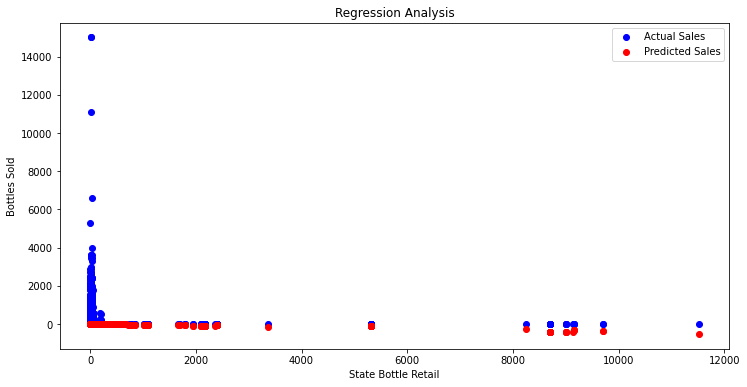

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(df_liquour['State Bottle Retail'], y_data_regression, color='blue', label='Actual Sales')
plt.scatter(df_liquour['State Bottle Retail'], df_liquour['Predicted_Bottles_Sold'], color='red', label='Predicted Sales')
plt.xlabel('State Bottle Retail')
plt.ylabel('Bottles Sold')
plt.title('Regression Analysis')
plt.legend()
plt.show()

In [37]:
df_liquour['Sale (Dollars)'] = df_liquour['Sale (Dollars)'].replace('[\$,]', '', regex=True).astype(float)

In [38]:
df_liquour.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Preference_Score,Predicted_Bottles_Sold
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,6,750,$18.09,27.14,6,162.84,4.50,1.19,5.939322,7.487456
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,6,750,$18.09,27.14,12,325.68,9.00,2.38,7.436704,7.487456
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,20,150,$6.40,9.60,2,19.20,0.30,0.08,6.424870,8.047460
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,3,1750,$35.55,53.34,3,160.02,5.25,1.39,5.903949,6.693378
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,20,150,$6.40,9.60,2,19.20,0.30,0.08,4.812893,8.047460


In [39]:
df_liquour['Date'] = pd.to_datetime(df_liquour['Date'])

In [40]:
df_liquour['Year'] = df_liquour['Date'].dt.year

In [41]:
yearly_sales = df_liquour.groupby('Year')['Sale (Dollars)'].sum().reset_index()
yearly_sales

,Year,Sale (Dollars)
0,2012,2.552033e+08
1,2013,2.581038e+08
2,2014,2.705877e+08
3,2015,2.843286e+08
4,2016,2.515319e+08
5,2017,1.482597e+08


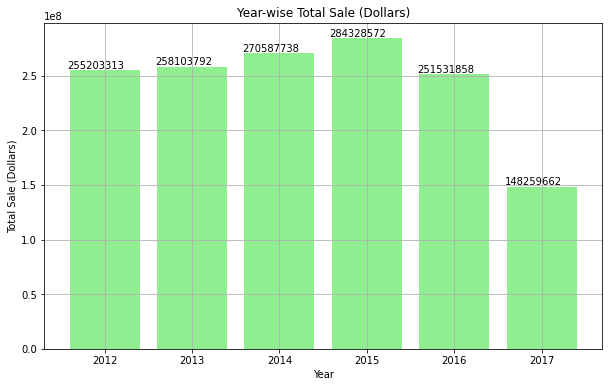

In [42]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(yearly_sales['Year'], yearly_sales['Sale (Dollars)'], color='lightgreen')
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1000, int(yval), ha='center', va='bottom')
plt.xlabel('Year')
plt.ylabel('Total Sale (Dollars)')
plt.title('Year-wise Total Sale (Dollars)')
plt.xticks(yearly_sales['Year'])
plt.grid(True)
plt.show()

In [43]:
df_liquour['Month'] = df_liquour['Date'].dt.month

In [44]:
monthly_sales = df_liquour.groupby('Month')['Sale (Dollars)'].sum().reset_index()
monthly_sales

,Month,Sale (Dollars)
0,1,1.044896e+08
1,2,1.122604e+08
2,3,1.176422e+08
3,4,1.239430e+08
4,5,1.302696e+08
5,6,1.368614e+08
6,7,1.243506e+08
7,8,1.275911e+08
8,9,1.128890e+08
9,10,1.486329e+08


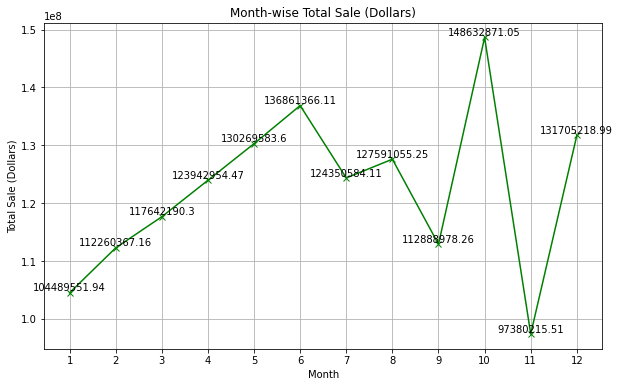

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sale (Dollars)'], marker='x', linestyle='-', color='green')
for i, row in monthly_sales.iterrows():
    plt.text(row['Month'], row['Sale (Dollars)'], f'{row["Sale (Dollars)"]}', ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Total Sale (Dollars)')
plt.title('Month-wise Total Sale (Dollars)')
plt.xticks(monthly_sales['Month'])
plt.grid(True)
plt.show()

### Dataset 2: sales.csv

In [46]:
df_sales = pd.read_csv('sales.csv')

C:\Users\yeswa\AppData\Local\Temp\ipykernel_3800\2603825323.py:1: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv('sales.csv')


#### 1. Dynamic pricing

In [47]:
def price_adjustnent(row):
    if row['sales'] > 0:
        return row['price'] * 1.1  
    elif row['stock'] < 6:
        return row['price'] * 0.9 
    return row['price']

df_sales['dynamic_price'] = df_sales.apply(price_adjustnent, axis=1)

In [48]:
df_sales.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,dynamic_price
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,6.250
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,6.875
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,6.875
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,6.250
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,5.625


In [49]:
drop_column = ['promo_bin_1', 'promo_bin_2', 'promo_discount_2', 'promo_discount_type_2']
new_df_sales = df_sales.drop(columns=drop_column)

In [50]:
new_df_sales.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_type_2,dynamic_price
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,PR03,6.250
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,PR03,6.875
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,PR03,6.875
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,PR03,6.250
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,PR03,5.625


#### 2. ⁠price elasticity

In [51]:
new_df_sales['price_change'] = new_df_sales.groupby('product_id')['price'].pct_change()
new_df_sales['sales_change'] = new_df_sales.groupby('product_id')['sales'].pct_change()

In [52]:
new_df_sales['price_elasticity'] = new_df_sales['sales_change'] / new_df_sales['price_change']

In [53]:
new_df_sales.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_type_2,dynamic_price,price_change,sales_change,price_elasticity
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,PR03,6.250,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,PR03,6.875,0.0,inf,inf
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,PR03,6.875,0.0,1.0,inf
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,PR03,6.250,0.0,-1.0,-inf
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,PR03,5.625,0.0,NaN,NaN


#### 3. Conjoint Analysis

In [54]:
new_df_sales = pd.get_dummies(new_df_sales, columns=['promo_type_1', 'promo_type_2'], drop_first=True)

In [55]:
new_df_sales.head()

,product_id,store_id,date,sales,revenue,stock,price,dynamic_price,price_change,sales_change,...,promo_type_1_PR12,promo_type_1_PR13,promo_type_1_PR14,promo_type_1_PR15,promo_type_1_PR16,promo_type_1_PR17,promo_type_1_PR18,promo_type_2_PR02,promo_type_2_PR03,promo_type_2_PR04
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,6.250,NaN,NaN,...,False,False,True,False,False,False,False,False,True,False
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,6.875,0.0,inf,...,False,False,True,False,False,False,False,False,True,False
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,6.875,0.0,1.0,...,False,False,True,False,False,False,False,False,True,False
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,6.250,0.0,-1.0,...,False,False,True,False,False,False,False,False,True,False
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,5.625,0.0,NaN,...,False,False,True,False,False,False,False,False,True,False


In [56]:
new_df_sales = new_df_sales.dropna()

In [57]:
new_df_sales.head()

,product_id,store_id,date,sales,revenue,stock,price,dynamic_price,price_change,sales_change,...,promo_type_1_PR12,promo_type_1_PR13,promo_type_1_PR14,promo_type_1_PR15,promo_type_1_PR16,promo_type_1_PR17,promo_type_1_PR18,promo_type_2_PR02,promo_type_2_PR03,promo_type_2_PR04
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,6.875,0.0,inf,...,False,False,True,False,False,False,False,False,True,False
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,6.875,0.0,1.0,...,False,False,True,False,False,False,False,False,True,False
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,6.250,0.0,-1.0,...,False,False,True,False,False,False,False,False,True,False
11,P0001,S0056,2017-01-02,1.0,5.30,6.0,6.25,6.875,0.0,inf,...,False,False,True,False,False,False,False,False,True,False
12,P0001,S0062,2017-01-02,0.0,0.00,2.0,6.25,5.625,0.0,-1.0,...,False,False,True,False,False,False,False,False,True,False


In [58]:
x_new = new_df_sales[['price', 'promo_type_1_PR14', 'promo_type_2_PR03']]
y_new = new_df_sales['sales']

In [59]:
model_lr = LinearRegression()
model_lr.fit(x_new, y_new)

LinearRegression()

In [60]:
conjoint_coefficients = pd.DataFrame(model_lr.coef_, x_new.columns, columns=['Coefficient'])
print(conjoint_coefficients)

                   Coefficient
price                -0.014037
promo_type_1_PR14    -0.282721
promo_type_2_PR03    -1.348480


#### 4. Regression Analysis

In [61]:
x_new_data1 = new_df_sales[['price', 'stock']]
x_new_data1 = sm.add_constant(x_new_data1)

In [62]:
y_new_data1 = new_df_sales['sales']

In [63]:
model_new_lr = sm.OLS(y_new_data1, x_new_data1).fit()

In [64]:
model_new_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5571.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:41:50   Log-Likelihood:            -2.2683e+07
No. Observations:             4751046   AIC:                         4.537e+07
Df Residuals:                 4751043   BIC:                         4.537e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8940      0.016     55.460      0.000       0.862       0.926
price         -0.0064      0.001     -8.037      0.000      -0.008      -0.005
stock          0.0268      0.000    104.224      0.000       0.026       0.027
==================================================================================
Omnibus:                 36446452.045   Durbin-Watson:                       1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   436867475746284928.000
Skew:                        1154.228   Prob(JB):                             0.00
Kurtosis:                 1485546.370   Cond. No.                             69.4
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
new_df_sales['date'] = pd.to_datetime(new_df_sales['date'])

In [66]:
new_df_sales['Year'] = new_df_sales['date'].dt.year

In [67]:
yearly_sales_data = new_df_sales.groupby('Year')['sales'].sum().reset_index()
yearly_sales_data

,Year,sales
0,2017,2364302.230
1,2018,2555142.171
2,2019,2124245.338


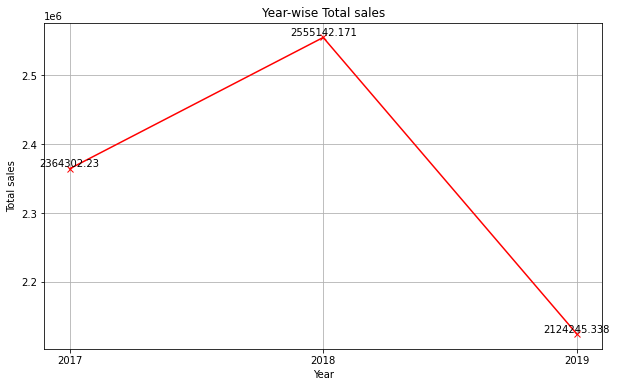

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_data['Year'], yearly_sales_data['sales'], marker='x', linestyle='-', color='red')
for i, row in yearly_sales_data.iterrows():
    plt.text(row['Year'], row['sales'], f'{row["sales"]}', ha='center', va='bottom')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.title('Year-wise Total sales')
plt.xticks(yearly_sales_data['Year'])
plt.grid(True)
plt.show()

In [69]:
new_df_sales['Month'] = new_df_sales['date'].dt.month

In [70]:
monthly_sales_data = new_df_sales.groupby('Month')['sales'].sum().reset_index()
monthly_sales_data

,Month,sales
0,1,571299.874
1,2,630285.941
2,3,595956.832
3,4,619267.855
4,5,603164.725
5,6,592036.931
6,7,650001.314
7,8,711958.181
8,9,649085.170
9,10,638130.305


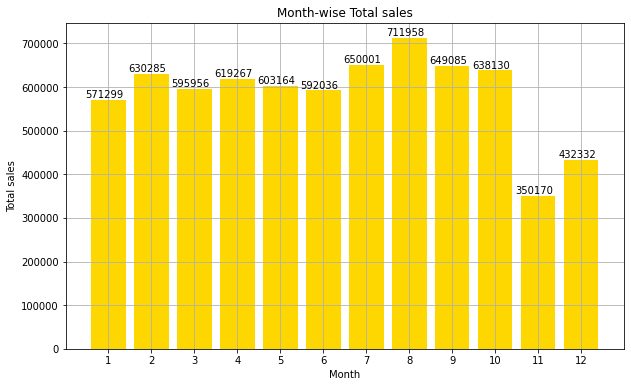

In [71]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(monthly_sales_data['Month'], monthly_sales_data['sales'], color='gold')
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1000, int(yval), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title('Month-wise Total sales')
plt.xticks(monthly_sales_data['Month'])
plt.grid(True)
plt.show()

In [72]:
yearly_revenue_data = new_df_sales.groupby('Year')['revenue'].sum().reset_index()
yearly_revenue_data

,Year,revenue
0,2017,8.415142e+06
1,2018,1.174697e+07
2,2019,1.391791e+07


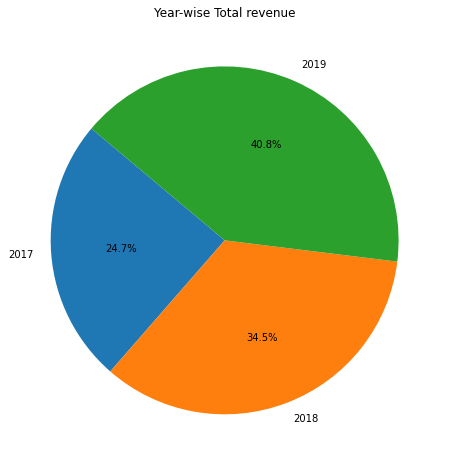

In [73]:
plt.figure(figsize=(8, 8))
plt.pie(yearly_revenue_data['revenue'], labels=yearly_revenue_data['Year'], autopct='%1.1f%%', startangle=140)
plt.title('Year-wise Total revenue')
plt.show()

In [74]:
monthly_revenue_data = new_df_sales.groupby('Month')['revenue'].sum().reset_index()
monthly_revenue_data

,Month,revenue
0,1,2660855.870
1,2,2423567.872
2,3,2561016.480
3,4,2664151.501
4,5,3077446.379
5,6,3037669.950
6,7,3151290.470
7,8,4271340.419
8,9,3345877.320
9,10,3297241.470


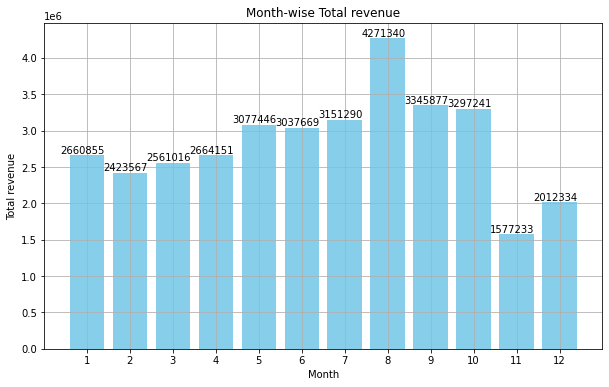

In [75]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(monthly_revenue_data['Month'], monthly_revenue_data['revenue'], color='skyblue')
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1000, int(yval), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Total revenue')
plt.title('Month-wise Total revenue')
plt.xticks(monthly_revenue_data['Month'])
plt.grid(True)
plt.show()

In [76]:
yearly_stock_data = new_df_sales.groupby('Year')['stock'].sum().reset_index()
yearly_stock_data

,Year,stock
0,2017,3.599068e+07
1,2018,4.176151e+07
2,2019,3.577820e+07


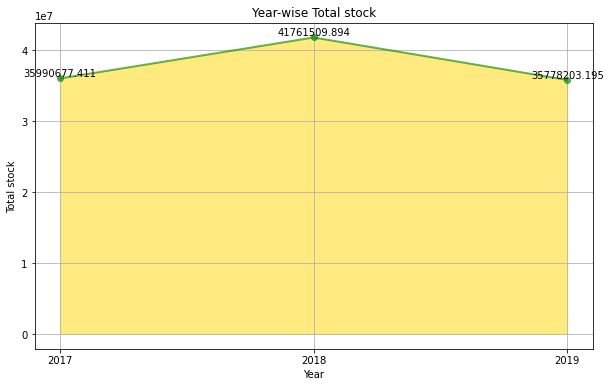

In [77]:
plt.figure(figsize=(10, 6))
plt.fill_between(yearly_stock_data['Year'], yearly_stock_data['stock'], color='gold', alpha=0.5)
plt.plot(yearly_stock_data['Year'], yearly_stock_data['stock'], color='green', marker='o', alpha=0.6, linewidth=2)
for i, row in yearly_stock_data.iterrows():
    plt.text(row['Year'], row['stock'], f'{row["stock"]}', ha='center', va='bottom')
plt.xlabel('Year')
plt.ylabel('Total stock')
plt.title('Year-wise Total stock')
plt.xticks(yearly_stock_data['Year'])
plt.grid(True)
plt.show()

In [78]:
monthly_stock_data = new_df_sales.groupby('Month')['stock'].sum().reset_index()
monthly_stock_data

,Month,stock
0,1,9.609784e+06
1,2,8.847726e+06
2,3,9.599529e+06
3,4,9.554249e+06
4,5,1.030763e+07
5,6,1.008673e+07
6,7,1.060066e+07
7,8,1.072368e+07
8,9,1.065901e+07
9,10,9.973301e+06


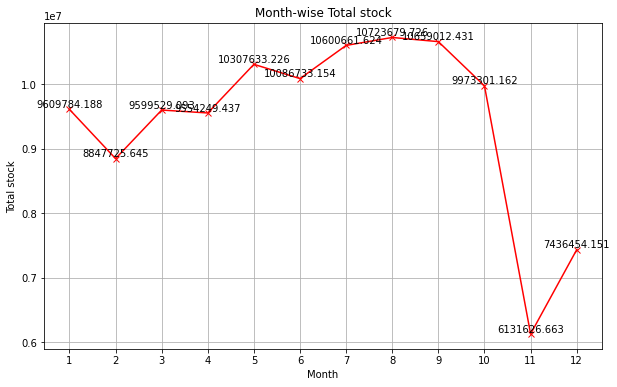

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_stock_data['Month'], monthly_stock_data['stock'], marker='x', linestyle='-', color='red')
for i, row in monthly_stock_data.iterrows():
    plt.text(row['Month'], row['stock'], f'{row["stock"]}', ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Total stock')
plt.title('Month-wise Total stock')
plt.xticks(monthly_stock_data['Month'])
plt.grid(True)
plt.show()